## Data Base with jupyter notebooke

In [1]:
#Set up dependencies
import sqlalchemy
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy import inspect
from config import connection_string




In [2]:
# Set up the connection with data base
engine=create_engine(f'postgresql+psycopg2://{connection_string}')
connection=engine.connect()



In [3]:
#From the Data Base select employees and salary to create a histogram graph
dataSalary=pd.read_sql(
    """SELECT Employees.Employee_Id, Employees.last_name, Employees.first_name, Employees.gender,
    Salaries.Salary
    FROM Employees
    INNER JOIN Salaries ON
    Employees.Employee_Id = Salaries.Employee_Id""",
    engine)



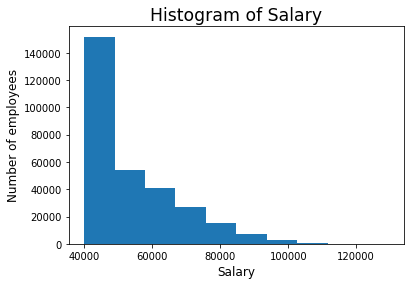

In [4]:
#Creating plot
plt.hist(dataSalary['salary'])
plt.title('Histogram of Salary', fontsize='xx-large')
plt.ylabel('Number of employees', fontsize='large')
plt.xlabel('Salary', fontsize='large')
plt.show()

In [5]:
#From the Data Base select salary bu title and estimate averange by title
dataTitleSalary=pd.read_sql("""SELECT
            Titles.title,
            ROUND(AVG(Salaries.Salary),2) as Averange
        FROM Titles
        INNER JOIN Salaries ON
            Titles.Employee_Id = Salaries.Employee_Id
        GROUP BY Titles.title"""
    ,engine)

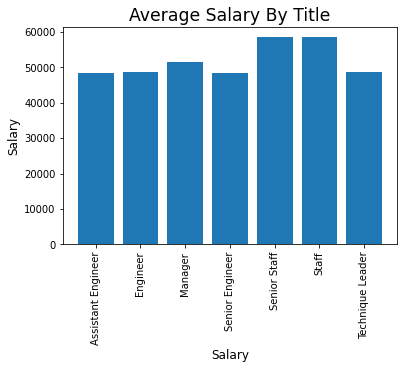

In [6]:
#Creating plot
x=dataTitleSalary['averange']                                
xlabels=dataTitleSalary['title']
plt.bar(xlabels, x)
plt.title('Average Salary By Title', fontsize='xx-large')
plt.ylabel('Salary', fontsize='large')
plt.xlabel('Salary', fontsize='large')
plt.xticks(rotation='vertical')
plt.show()

## Epilogue

In [7]:
 #Epilogue Employer_number='499942'
target='499942' #in the case of change
epilogue=pd.read_sql(f"""SELECT 
    Department_Employees.Employee_Id,
    Employees.last_name,
    Employees.first_name,
    Department_Employees.from_date,
    Department_Employees.to_date,
    Department.department_name,
    Titles.title
    FROM Department_Employees
    INNER JOIN Department  ON
    Department_Employees.Department_Id=Department.Department_Id
    INNER JOIN Employees ON
    Department_Employees.Employee_Id=Employees.Employee_Id
    INNER JOIN Titles ON
    Department_Employees.Employee_Id=Titles.Employee_Id
    WHERE Employees.Employee_Id={target}""",

                     engine)
epilogue

,employee_id,last_name,first_name,from_date,to_date,department_name,title
0,499942,Foolsday,April,1998-03-28,9999-01-01,Development,Technique Leader
